In [ ]:
# Definindo a versão do tensorflow
%tensorflow_version 1.x

In [ ]:
# Importanto bibliotecas gerais
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
# Importando bibliotecas Scikit Learn:
from sklearn.datasets import make_blobs

In [ ]:
# Criando o dataset:

# Definindo o número de amostras
N = 100
# Definindo os centros:
centers = [[-5, 0], [0, 1.5], [5, -1]]
# Criando o dataset
x, y = make_blobs(n_samples=N, centers = centers, random_state = 42)

# Fazendo o reshape para y:
y = y.reshape(-1, 1)

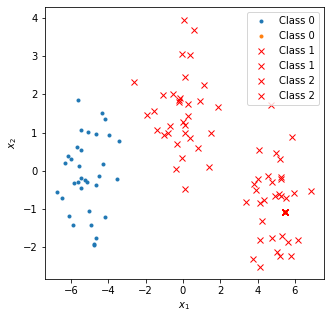

In [ ]:
idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)
idx2 = np.argwhere(y == 2)

fig = plt.figure(figsize=(5,5))
plt.plot(x[idx0,0], x[idx0,1], '.', label='Class 0')
plt.plot(x[idx1,0], x[idx1,1], 'rx', label='Class 1')
plt.plot(x[idx2,0], x[idx2,1], 'rx', label='Class 2')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.show()

In [ ]:
# Imprimindo a configuração do dataset:
print('Dimensão de X: {}'.format(x.shape))
print('Dimensão de Y: {}'.format(y.shape))

Dimensão de X: (100, 2)
Dimensão de Y: (100, 1)


In [ ]:
# Configuração dos neuronios:
entrada = 2
oculta  = 3 
saida   = 1

In [ ]:
# Definição dos pesos
W = {'camada_oculta': tf.Variable(tf.random_normal([entrada, oculta]), name = 'W_oculta'),
     'camada_saida' : tf.Variable(tf.random_normal([oculta, saida]), name = 'W_saida')}

In [ ]:
# Definição dos bias:
B = {'camada_oculta': tf.Variable(tf.random_normal([oculta]), name = 'B_oculta'),
     'camada_saida':  tf.Variable(tf.random_normal([saida]), name = 'B_saida')}

In [ ]:
# Definindo os placeholder's:
xph = tf.placeholder(tf.float32, [100, entrada], name = 'xph')
yph = tf.placeholder(tf.float32, [100, saida], name = 'yph')

In [ ]:
# Camada OCULTA:

# Multiplicando as entradas pelos pesos da camada oculta e adicionando o bias na camada oculta:
oculta = tf.add(tf.matmul(xph, W['camada_oculta']), B['camada_oculta'])
# Aplicando a função de ativação na camada oculta:
ativacao_oculta = tf.sigmoid(oculta)

In [ ]:
# Camada SAÍDA:

# Multiplicando as saídas da camada oculta pelos pesos da camada de saída e adicionando o bias na cadama de saída:
saida = tf.add(tf.matmul(ativacao_oculta, W['camada_saida']), B['camada_saida'])
# Aplicando a função de ativação na camada de saída:
ativacao_saida = tf.sigmoid(saida)

In [ ]:
# Cálculo do erro quadrático médio:
error = tf.losses.mean_squared_error(yph, ativacao_saida)

# Definindo o otimizador:
otm = tf.train.GradientDescentOptimizer(learning_rate=0.3).minimize(error)

In [ ]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
  sess.run(init)
  for epoch in range(20000):
    mean_error = 0
    _, cost = sess.run([otm, error], feed_dict= {xph: x, yph: y})
    if epoch % 100 == 0:
      mean_error += cost / 4
      print('Epoch: {}'.format(epoch))
      print('Mean error: {}'.format(mean_error))

  W_final, B_final = sess.run([W, B])

Epoch: 0
Mean error: 0.21280106902122498
Epoch: 100
Mean error: 0.10259725898504257
Epoch: 200
Mean error: 0.09210828691720963
Epoch: 300
Mean error: 0.08865778148174286
Epoch: 400
Mean error: 0.08690976351499557
Epoch: 500
Mean error: 0.08586502820253372
Epoch: 600
Mean error: 0.08518286049365997
Epoch: 700
Mean error: 0.08470970392227173
Epoch: 800
Mean error: 0.08436594158411026
Epoch: 900
Mean error: 0.08410677313804626
Epoch: 1000
Mean error: 0.08390548080205917
Epoch: 1100
Mean error: 0.08374527096748352
Epoch: 1200
Mean error: 0.08361515402793884
Epoch: 1300
Mean error: 0.08350766450166702
Epoch: 1400
Mean error: 0.08341752737760544
Epoch: 1500
Mean error: 0.08334105461835861
Epoch: 1600
Mean error: 0.08327541500329971
Epoch: 1700
Mean error: 0.0832185447216034
Epoch: 1800
Mean error: 0.0831688717007637
Epoch: 1900
Mean error: 0.08312513679265976
Epoch: 2000
Mean error: 0.08308636397123337
Epoch: 2100
Mean error: 0.08305180817842484
Epoch: 2200
Mean error: 0.08302082121372223
Ep